#  Exploring and Visualizing a Simple Dataset - Iris Dataset

This notebook demonstrates basic data analysis and visualization techniques using the famous Iris dataset.  
We will:

- Load and understand the data
- Check for missing values
- Perform basic statistical analysis
- Visualize the features with the help of graphs


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
# Load the dataset from seaborn
df = sns.load_dataset('iris')

# Show the first 5 rows
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [18]:
# Check the shape of the dataset
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.\n")


The dataset contains 150 rows and 5 columns.



In [31]:
# Info summary
print("\nDataset Info:")
print(df.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [14]:
# Summary statistics
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [20]:
# Column names
print("\nColumn names:", df.columns.tolist())


Column names: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


In [22]:
# Check for missing values
df.isnull().sum()

# If any missing values were found, we could handle them here
# For example:
# df.dropna(inplace=True)


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

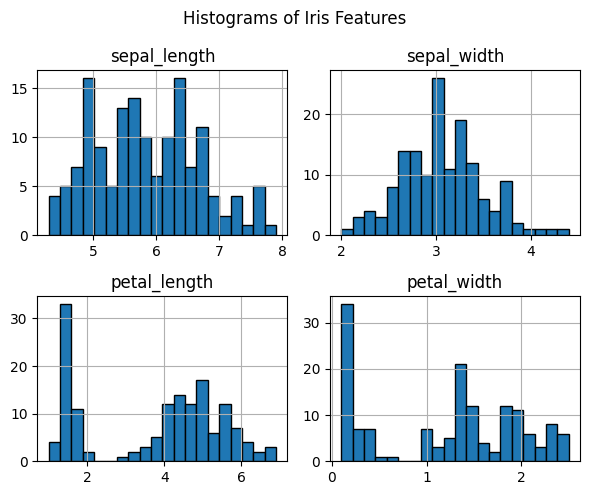

In [30]:
# Histograms for each feature
df.hist(figsize=(6, 5), bins=20, edgecolor='black')
plt.suptitle("Histograms of Iris Features")
plt.tight_layout()
plt.show()


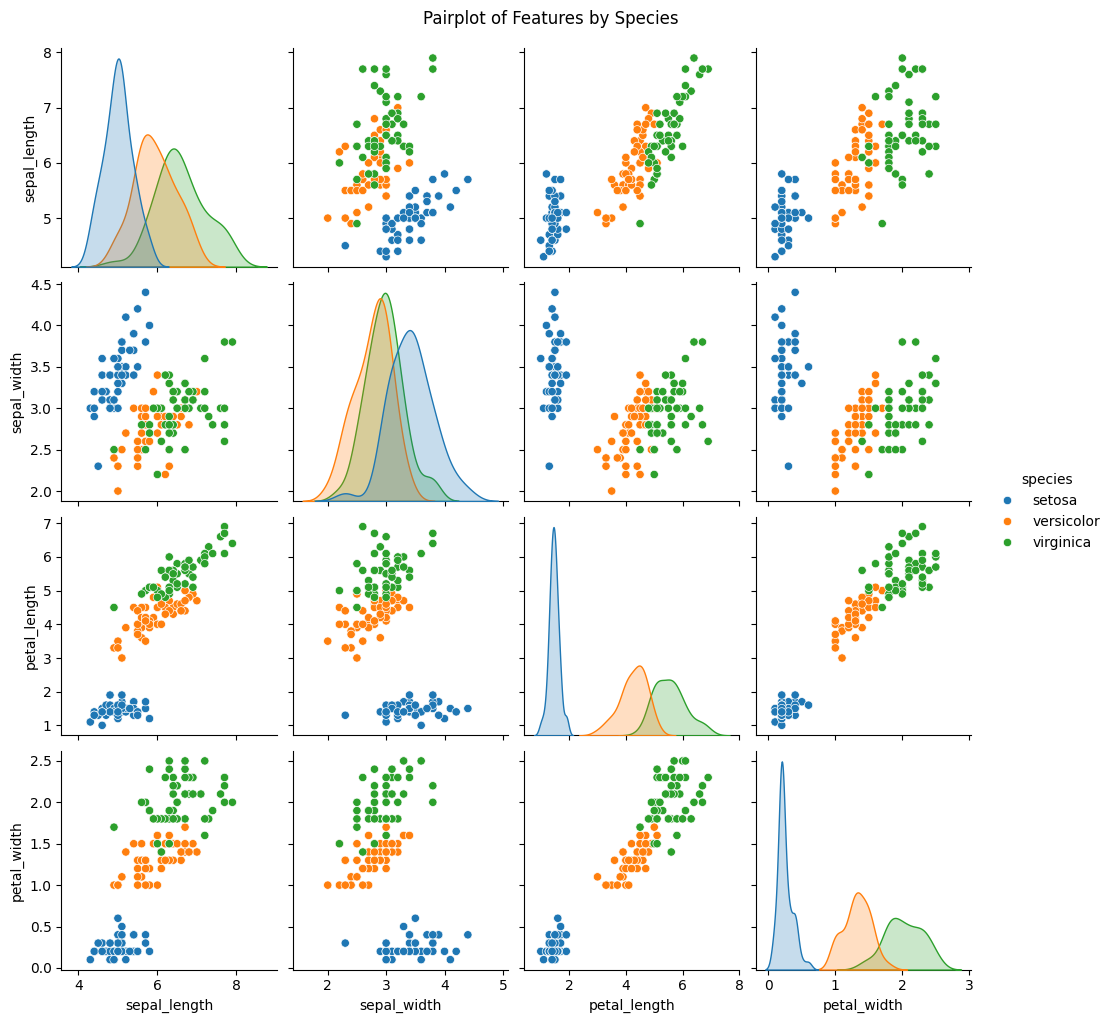

In [28]:
# Pairplot for feature relationships
sns.pairplot(df, hue="species")
plt.suptitle("Pairplot of Features by Species", y=1.02)
plt.show()


#   Boxplots of Numeric Features (Overall)

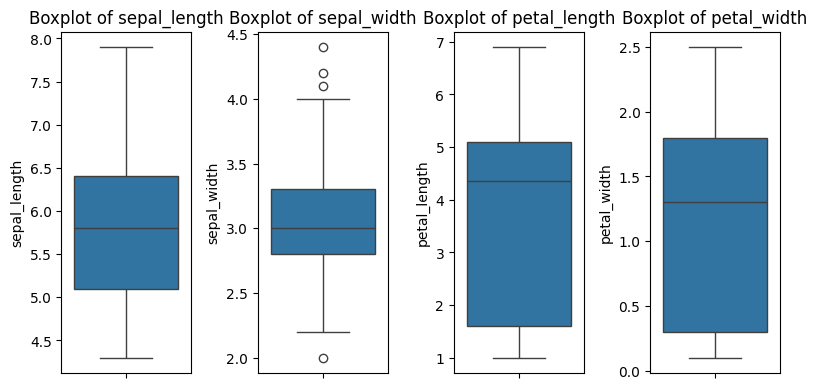

In [48]:
plt.figure(figsize=(8, 4))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(1, 4, i+1)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


#     Boxplots of Sepal Length Grouped by Species

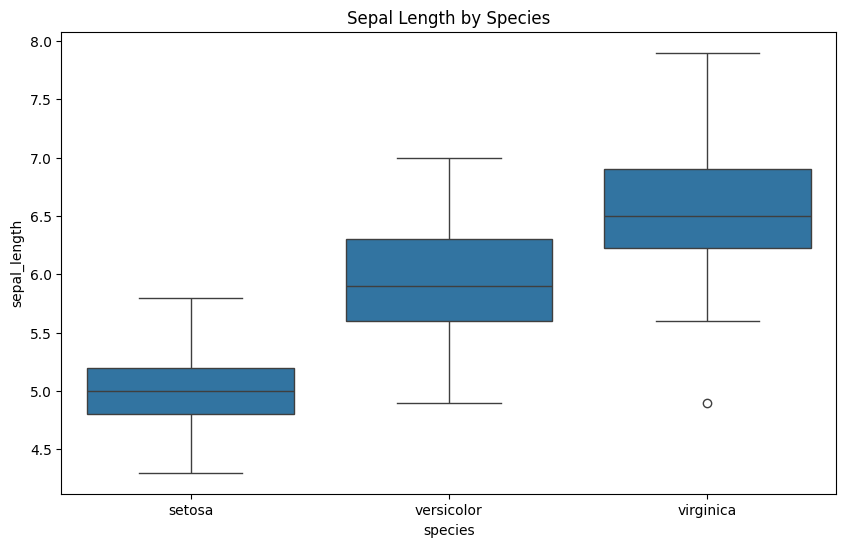

In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="species", y="sepal_length", data=df)
plt.title("Sepal Length by Species")
plt.show()


#   📊 Grouped Boxplot of All Features by Species

This plot helps us compare the distribution of each feature (sepal and petal lengths/widths) across all three species.  
We used `pd.melt()` to reshape the dataset for this grouped visualization.


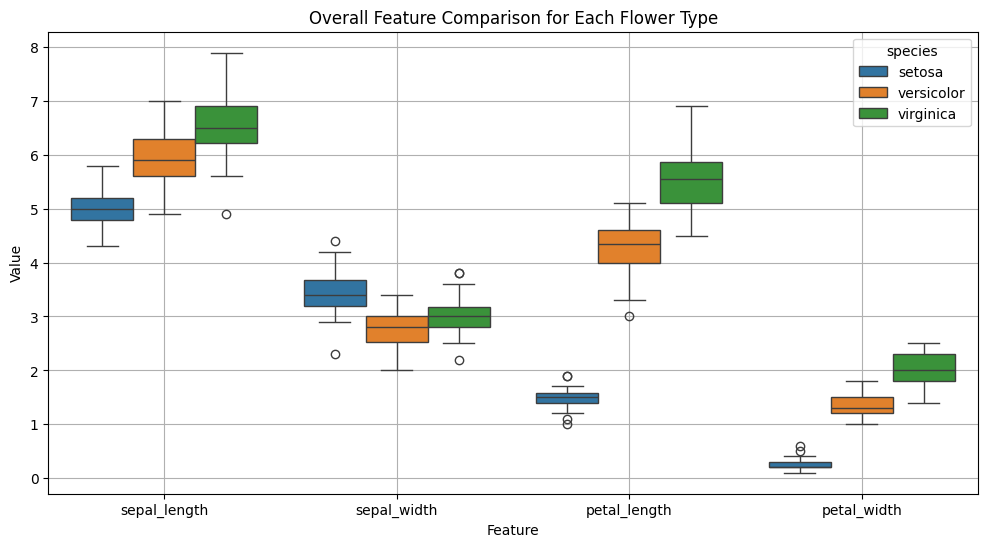

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
df = sns.load_dataset('iris')

# Step 1: Melt the dataset (reshape for grouped box plot)
df_melted = pd.melt(df, id_vars="species", var_name="Feature", value_name="Value")

# Step 2: Plot all features for each species
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_melted, x="Feature", y="Value", hue="species")
plt.title("Overall Feature Comparison for Each Flower Type")
plt.grid(True)
plt.show()


# 🌼 Predicting Species of a New Flower (Visual Classification)

In this step, we simulate a new flower with petal_length = 5.1 cm and petal_width = 1.8 cm.  
We plot it against the known Iris dataset to visually determine its likely species.


C:\Users\Admin\AppData\Local\Temp\ipykernel_11240\3970315643.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_combined = pd.concat([df, new_flower], ignore_index=True)


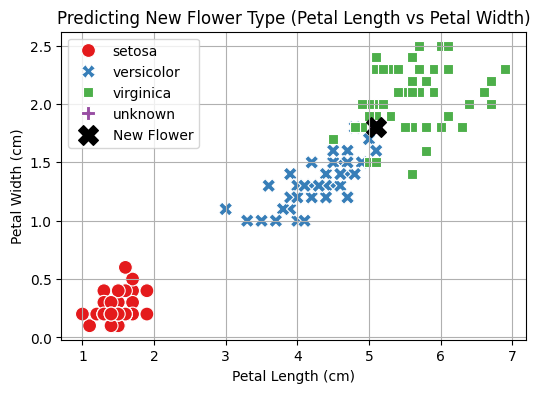

In [64]:
# Add new flower in above dataset to check, where the new flower is fall....

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the Iris dataset
df = sns.load_dataset('iris')

# Step 2: Add a new flower manually
# New flower: Petal length = 5.1, Petal width = 1.8
new_flower = pd.DataFrame({
    'sepal_length': [None],     # Unknown or not needed for now
    'sepal_width': [None],      # Unknown or not needed for now
    'petal_length': [5.1],
    'petal_width': [1.8],
    'species': ['unknown']      # Because we want to predict it
})

# Step 3: Combine with the original data
df_combined = pd.concat([df, new_flower], ignore_index=True)

# Step 4: Scatter plot of petal_length vs petal_width
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_combined, x='petal_length', y='petal_width', hue='species', style='species', palette='Set1', s=100)

# Highlight the new flower with a special marker
plt.scatter(5.1, 1.8, color='black', marker='X', s=200, label='New Flower')

plt.title("Predicting New Flower Type (Petal Length vs Petal Width)")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend()
plt.grid(True)
plt.show()


## ✅ Conclusion

In this notebook, we explored the classic Iris dataset using various data visualization techniques. Here's a summary of what we accomplished:

- 🔍 Loaded and understood the structure of the dataset.
- 📊 Created histograms and boxplots to analyze the distribution of each numeric feature.
- 📈 Visualized the relationships between features using scatter plots and pair plots.
- 🧪 Compared features across different species using grouped boxplots.
- 🌼 Simulated a new flower with given measurements and visually analyzed its potential species based on its position in the plot.

These exploratory visualizations help in understanding how different flower types (Setosa, Versicolor, and Virginica) differ based on their measurements. The added example of a new flower also demonstrated a simple yet effective method of visual classification.

This project serves as a solid foundation for further machine learning applications such as classification using algorithms like KNN, SVM, or Decision Trees.

---

🎯 Thank you for viewing this notebook!  
